In [1]:
import pandas as pd
from Bio import Restriction, SeqIO
from ntaxon.fingerprinting.rflp import RestrictionDigestion
import os
import pandas as pd

In [2]:
main_accessions = pd.read_csv('./data/ref_seq_accessions.csv')
main_accessions.drop("Unnamed: 0", inplace=True, axis=1)
main_accessions.head()

,accession,species,sequence
0,NR_025227.1,Pseudomonas umsongensis,AACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGATGAAGAG...
1,NR_157609.1,Bacillus haynesii,AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATA...
2,NR_116064.1,Curtobacterium oceanosedimentum,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATGAT...
3,NR_104839.1,Curtobacterium oceanosedimentum,TCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGA...
4,NR_115988.1,Acinetobacter rudis,CCAGGGATTTGATTATGGCTCAGATTGAACGCTGGCGGCAGGCTTA...


In [3]:
# Fetch similar accessions
similar_accessions = pd.DataFrame(columns=['accession', 'strain_ref', 'sequence'])
for root, dirs, files in os.walk("./data/similar_ref_seq", topdown=False):
    for file in files:
        filepath = f"./data/similar_ref_seq/{file}"
        if file.endswith('.fasta') and os.path.isfile(filepath):
            records = list(SeqIO.parse(filepath, 'fasta'))
            for r in records:
                similar_accessions = similar_accessions.append({
                    "accession": r.id,
                    "strain_ref": os.path.splitext(file)[0],
                    "sequence": str(r.seq)
                }, ignore_index=True)

similar_accessions.head()

,accession,strain_ref,sequence
0,MN513225.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...
1,JF710959.1,NR_025357.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...
2,KT988067.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...
3,KP224304.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...
4,KF534470.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...


In [4]:
main_indexed_accessions = main_accessions.set_index("accession")
main_indexed_accessions.head()

,species,sequence
accession,,
NR_025227.1,Pseudomonas umsongensis,AACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGATGAAGAG...
NR_157609.1,Bacillus haynesii,AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATA...
NR_116064.1,Curtobacterium oceanosedimentum,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATGAT...
NR_104839.1,Curtobacterium oceanosedimentum,TCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGA...
NR_115988.1,Acinetobacter rudis,CCAGGGATTTGATTATGGCTCAGATTGAACGCTGGCGGCAGGCTTA...


In [5]:
# Assign Species
similar_accessions['species'] = similar_accessions.apply(lambda c: main_indexed_accessions.loc[c.strain_ref].species, axis=1)
similar_accessions.head()

,accession,strain_ref,sequence,species
0,MN513225.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,Alcaligenes faecalis
1,JF710959.1,NR_025357.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,Alcaligenes faecalis
2,KT988067.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,Alcaligenes faecalis
3,KP224304.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,Alcaligenes faecalis
4,KF534470.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,Alcaligenes faecalis


In [6]:
# All availabe Species
similar_accessions['species'].unique()

array(['Alcaligenes faecalis'], dtype=object)

In [10]:
# Import sample sequences
sample_sequences = pd.read_csv('./outputs/accession_details_all.csv')
sample_sequences.head()

,accession,isolate,sequence,species,genera,phylum
0,MN493874.1,K2,AAGGGGTGGCCTACACATGCAAGTCGAACGGCAGCACAGGAGAGCT...,Stenotrophomonas maltophilia,Stenotrophomonas,Proteobacteria
1,MN493875.1,K4,GGCGCAGGCCTACACATGCAAGTCGAACGAACTCTTCGGAGTTAGT...,Brevundimonas naejangsanensis,Brevundimonas,Proteobacteria
2,MN493876.1,K7,AATGCGGGGCCTACACATGCAAGTCGAACGGCAGCACAGGAGAGCT...,Stenotrophomonas pavanii,Stenotrophomonas,Proteobacteria
3,MN493877.1,K9,CCAAGGGCGGCCTTACCATGCAAGTCGAGCGCCCCGCAAGGGGAGC...,Ochrobactrum anthropi,Ochrobactrum,Proteobacteria
4,MN493878.1,K10,GCAGCTTACCATGCAAGTCGAGCGCCCCGCAAGGGGAGCGGCAGAC...,Ochrobactrum anthropi,Ochrobactrum,Proteobacteria


# Start Haplotype Analysis

In [9]:
#Analyse Species Wise
SPECIES = 'Alcaligenes faecalis'

In [42]:
# Filter sample sequences
sp_sample_sequences = sample_sequences[sample_sequences['species'] == SPECIES]

# Add a identifier column
sp_sample_sequences['identifier'] = 'SAMP_' + sp_sample_sequences[['accession']]

sp_sample_sequences.head()

<ipython-input-42-8e03085a45b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_sample_sequences['identifier'] = 'SAMP_' + sp_sample_sequences[['accession']]


,accession,isolate,sequence,species,genera,phylum,identifier
7,MN493881.1,K13,ATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTCTCTTGGCGGCG...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493881.1
8,MN493882.1,K14,CCATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTCTCTTGGCGG...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493882.1
12,MN493886.1,K19,CGGAGCTTTCACATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCT...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493886.1
13,MN493887.1,K20,CGGGAGCTTTCACATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGC...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493887.1
26,MN493901.1,K44,GGAGCCTTACCATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTC...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493901.1


In [38]:
entries = similar_accessions[similar_accessions['species'] == SPECIES][['accession', 'sequence']]

# Append from existing records
entries = entries.append(
    main_indexed_accessions[main_indexed_accessions['species'] == SPECIES].reset_index()[['accession', 'sequence']]
, ignore_index=True)

# Add a identifier column
entries['identifier'] = 'REF_' + entries[['accession']]
entries.head()

,accession,sequence,identifier
0,MN513225.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_MN513225.1
1,JF710959.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,REF_JF710959.1
2,KT988067.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_KT988067.1
3,KP224304.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KP224304.1
4,KF534470.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KF534470.1


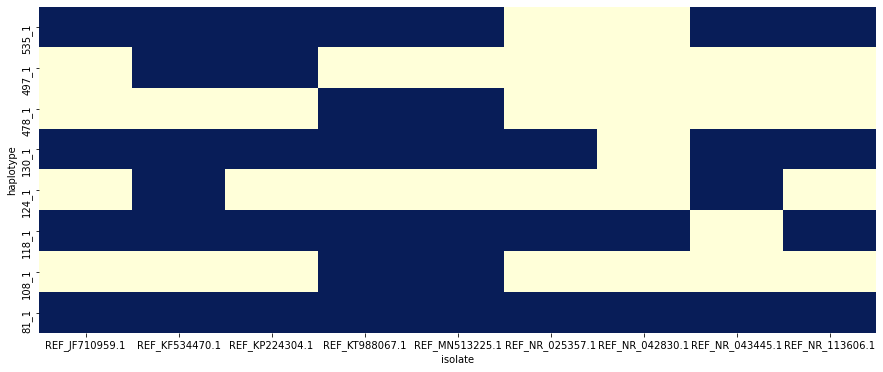

In [43]:
# Perform restriction Digestion
mspI_digestion = RestrictionDigestion(
    accessions=entries, 
    enzyme=Restriction.MspI, 
    label_col="identifier",
    sequence_col="sequence"
)

matrix = mspI_digestion.digestion_profile()

# Binary Matrix
matrix_bin = matrix.get_binary_matrix() 

mspI_digestion.plot_electrophoretic_diagram(
    min_frequency=1, 
    min_common_haplotye=5, 
    min_size=50, 
    figsize=(15, 6), 
#    lane_order=col_names_reordered
)

In [44]:
entries_merged = entries.append(sp_sample_sequences[['accession', 'sequence', 'identifier']], ignore_index=True)
#entries_merged['sequence'] = entries_merged['sequence'].str.strip()
entries_merged.head()

,accession,sequence,identifier
0,MN513225.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_MN513225.1
1,JF710959.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,REF_JF710959.1
2,KT988067.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_KT988067.1
3,KP224304.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KP224304.1
4,KF534470.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KF534470.1


In [ ]:
# entries_merged.groupby('accession').count().reset_index()

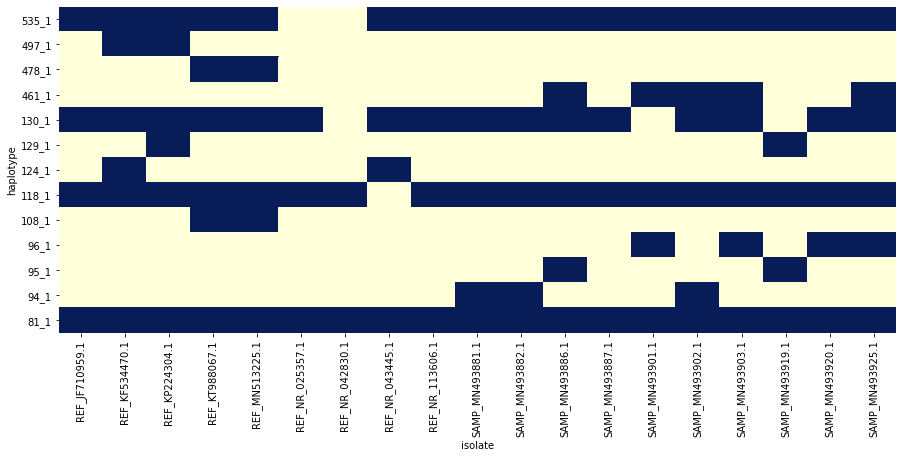

In [45]:
# Perform restriction Digestion
mspI_digestion = RestrictionDigestion(
    accessions=entries_merged, 
    enzyme=Restriction.MspI, 
    label_col="identifier",
    sequence_col="sequence"
)

matrix = mspI_digestion.digestion_profile()

# Binary Matrix
matrix_bin = matrix.get_binary_matrix() 

mspI_digestion.plot_electrophoretic_diagram(
    min_frequency=1, 
    min_common_haplotye=5, 
    min_size=50, 
    figsize=(15, 6), 
#    lane_order=col_names_reordered
)